In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('new_filename.csv')

In [ ]:
df['Device Type'].value_counts()

In [ ]:
df['Device Type'] = df['Device Type'].fillna(value='unknown') 

In [ ]:
df['City'].value_counts()
df["City"] = df["City"].replace("-", "unknown") 
df['City'] = df['City'].fillna(value='unknown')

In [ ]:
df['Region'].value_counts() 
df["Region"] = df["Region"].replace("-", "unknown")
df['Region'] = df['Region'].fillna(value='unknown') 

In [ ]:
top_user_id = df['User ID'].value_counts().idxmax()

# Remove all rows associated with the top user
df.drop(df[df['User ID'] == top_user_id].index, inplace=True)

# Verify the removal
unique_users = df['User ID'].nunique()
print("Number of unique users after removal:", unique_users)

In [ ]:
df['Browser Category'].nunique()

In [ ]:
df["Browser Category"] = df["Browser Category"].replace("-", "unknown")
df['Browser Category'] = df['Browser Category'].fillna(value='unknown')

In [ ]:
df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])

# Extract date and time components
df['Date'] = df['Login Timestamp'].dt.date
df['Time'] = df['Login Timestamp'].dt.time

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Login Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second

In [ ]:
df[['Octet1', 'Octet2', 'Octet3', 'Octet4']] = df['IP Address'].str.split('.', expand=True).astype(int)

In [ ]:
df = df.drop(['Login Timestamp', 'IP Address', 'Timestamp'], axis = 1)

In [ ]:
df['NumSuccessfulLogins'] = df.groupby('User ID')['Login Successful'].transform('sum')

# Grouping the data by "User ID" and count the number of False values in "Login Successful"
false_counts = df[df['Login Successful'] == False].groupby('User ID').size().reset_index(name='NumUnsuccessfulLogins')

# Merging the false_counts DataFrame with the original data
df = df.merge(false_counts, on='User ID', how='left')

# Filling NaN values in the new column with 0
df['NumUnsuccessfulLogins'] = df['NumUnsuccessfulLogins'].fillna(0)

# Converting the values in the "False Count" column to integers
df['NumUnsuccessfulLogins'] = df['NumUnsuccessfulLogins'].astype(int)

In [ ]:
df['NumSuccessfulLogins'] = df['NumSuccessfulLogins'].replace(0, 1)

In [ ]:
df['LoginRatio'] = df['NumUnsuccessfulLogins'] / df['NumSuccessfulLogins']
df['LoginRatio'].replace(np.inf, 0, inplace=True)

In [ ]:
df = df.drop(['NumSuccessfulLogins', 'NumUnsuccessfulLogins'], axis = 1)

In [ ]:
# Calculating the total number of different device types used by each user
device_counts = df.groupby('User ID')['Device Type'].transform('nunique')

# Adding the column to the DataFrame
df['Total Devices Per User'] = device_counts

In [ ]:
# Calculating the total number of different countries visited by each user
country_counts = df.groupby('User ID')['Country'].transform('nunique')

# Adding the column to the DataFrame
df['Total Countries Per User'] = country_counts

In [ ]:
# Calculating the total number of different browser categories used by each user
browser_counts = df.groupby('User ID')['Browser Category'].transform('nunique')

# Add the 'Total Browser Categories' column to the DataFrame
df['Total Browser Categories Per User'] = browser_counts


In [ ]:
df.info()

In [3]:
df.head()

,User ID,Country,Region,City,Device Type,Login Successful,Browser Category,Octet1,Octet2,Octet3,...,Year,Month,Day,Hour,Minute,Second,LoginRatio,Total Devices Per User,Total Countries Per User,Total Browser Categories Per User
0,-3284137479262433373,NO,Vestland,Urangsvag,mobile,True,Android,81,167,144,...,2020,2,3,12,43,55,0.052632,2,1,4
1,-4618854071942621186,US,Virginia,Ashburn,mobile,False,Chrome Mobile WebView,10,0,0,...,2020,2,3,12,43,59,2.000000,1,1,1
2,7246533443898239661,NO,unknown,unknown,desktop,True,Chrome,80,202,228,...,2020,2,3,12,44,7,1.000000,2,1,2
3,-3243978724802435038,US,unknown,unknown,mobile,False,Chrome Mobile,170,39,78,...,2020,2,3,12,44,12,1.500000,1,1,1
4,8076000552587369902,NO,unknown,unknown,mobile,False,MiuiBrowser,10,0,61,...,2020,2,3,12,44,17,0.007533,2,1,4


In [8]:
# Select the categorical columns to encode
categorical_columns = ['Country', 'Region', 'City', 'Device Type', 'Browser Category']

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
# Convert the 'Login Successful' column to int
df['Login Successful'] = df['Login Successful'].astype(int)

# Convert the 'LoginRatio' column to int or any other desired data type
df['LoginRatio'] = df['LoginRatio'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17243365 entries, 0 to 17243364
Data columns (total 21 columns):
 #   Column                             Dtype
---  ------                             -----
 0   User ID                            int64
 1   Country                            int64
 2   Region                             int64
 3   City                               int64
 4   Device Type                        int64
 5   Login Successful                   int64
 6   Browser Category                   int64
 7   Octet1                             int64
 8   Octet2                             int64
 9   Octet3                             int64
 10  Octet4                             int64
 11  Year                               int64
 12  Month                              int64
 13  Day                                int64
 14  Hour                               int64
 15  Minute                             int64
 16  Second                             int64
 17  LoginR

In [14]:
df.head()

,User ID,Country,Region,City,Device Type,Login Successful,Browser Category,Octet1,Octet2,Octet3,...,Year,Month,Day,Hour,Minute,Second,LoginRatio,Total Devices Per User,Total Countries Per User,Total Browser Categories Per User
0,-3284137479262433373,146,1802,24909,2,1,2,81,167,144,...,2020,2,3,12,43,55,0,2,1,4
1,-4618854071942621186,202,1818,1232,2,0,10,10,0,0,...,2020,2,3,12,43,59,2,1,1,1
2,7246533443898239661,146,1916,26921,1,1,8,80,202,228,...,2020,2,3,12,44,7,1,2,1,2
3,-3243978724802435038,202,1916,26921,2,0,9,170,39,78,...,2020,2,3,12,44,12,1,1,1,1
4,8076000552587369902,146,1916,26921,2,0,31,10,0,61,...,2020,2,3,12,44,17,0,2,1,4


In [18]:
selected_columns = ['Octet1', 'Octet2', 'Octet3', 'LoginRatio', 'Total Devices Per User', 'Total Countries Per User', 'Total Browser Categories Per User','Country', 'City', 'Region','Device Type', 'Login Successful','Browser Category']

In [20]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_columns])

In [21]:
# Perform PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [22]:
# Access the explained variance ratios or principal component loadings
explained_variance_ratio = pca.explained_variance_ratio_
principal_component_loadings = pca.components_

In [23]:
# Print the explained variance ratios or principal component loadings
for feature, variance_ratio, loadings in zip(selected_columns, explained_variance_ratio, principal_component_loadings):
    print(f"{feature}: Explained Variance Ratio = {variance_ratio}, Loadings = {loadings}")

Octet1: Explained Variance Ratio = 0.1823766268024139, Loadings = [-2.57836346e-01  8.74857977e-02 -2.90931287e-02 -2.18773720e-05
  4.88770319e-01  1.64149168e-01  4.74682485e-01 -2.90815653e-01
 -3.50064882e-01 -3.13687963e-01 -2.43055388e-01  2.62140126e-01
 -2.32967133e-02]
Octet2: Explained Variance Ratio = 0.10980850006182005, Loadings = [ 0.26051156  0.23544746  0.20634456 -0.33797139  0.34978819  0.15180026
  0.39020194  0.15474615  0.34526869  0.46620579  0.16638088  0.10508471
  0.15169954]
Octet3: Explained Variance Ratio = 0.09563035631658413, Loadings = [-0.27385046 -0.71406092 -0.45217466 -0.28789513  0.03053887  0.18345497
  0.07698757 -0.05445501  0.19644615  0.15050922  0.09295318  0.08340859
  0.0863436 ]
LoginRatio: Explained Variance Ratio = 0.0909320953267244, Loadings = [-0.12441987  0.05310812  0.0179049  -0.0513357  -0.03046261 -0.06770448
  0.09333055  0.06846819 -0.27126966 -0.24299442  0.5830214  -0.18459851
  0.67320788]
Total Devices Per User: Explained Var

In [26]:
import numpy as np 


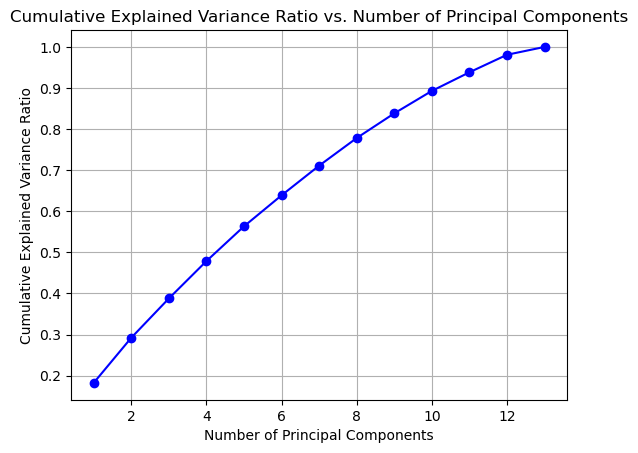

In [27]:
 #Calculate the cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [28]:
#Octet1, Octet2, Octet3, LoginRatio, Total Devices Per User, Total Countries Per User, Total Browser Categories Per User, and Country appear to be relatively important features

In [40]:
wcss = []  
max_clusters = 10  

for k in range(1, max_clusters + 1):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/Users/akshitbansal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akshitbansal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akshitbansal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/akshitbansal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

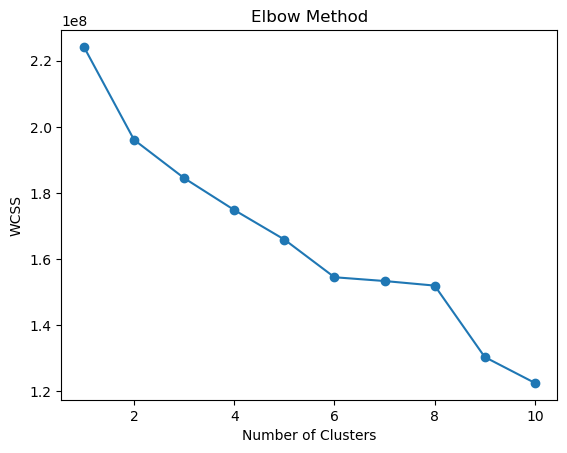

In [41]:
# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [45]:
# Perform k-means clustering
k = 9  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_scaled)

/Users/akshitbansal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=0)

In [46]:
# Get the cluster labels
cluster_labels = kmeans.labels_

In [47]:
# Add the cluster labels to the original dataset
df['Cluster'] = cluster_labels

In [48]:
# Analyze 
cluster_counts = df['Cluster'].value_counts()
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [50]:
# Printing the cluster information
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: Count = {count}")

Cluster 7: Count = 3451099
Cluster 1: Count = 3276728
Cluster 4: Count = 2705980
Cluster 3: Count = 2594821
Cluster 0: Count = 2435546
Cluster 5: Count = 1509908
Cluster 2: Count = 1195186
Cluster 6: Count = 70028
Cluster 8: Count = 4069


In [52]:
# Printing the cluster centers (average values for each feature)
for cluster, center in enumerate(cluster_centers):
    print(f"Cluster {cluster} Center:")
    for feature, value in zip(selected_columns, center):
        print(f"{feature}: {value}")

Cluster 0 Center:
Octet1: 67.74329254519373
Octet2: 165.6554184996396
Octet3: 204.87151647336287
LoginRatio: 0.9939548910192286
Total Devices Per User: 1.0583434995665153
Total Countries Per User: 1.017780434005872
Total Browser Categories Per User: 1.2726329106631797
Country: 173.7554542355415
City: 21632.666561925398
Region: 1764.132973921427
Device Type: 1.8723967254459992
Login Successful: 0.6143477385777704
Browser Category: 8.975568590240615
Cluster 1 Center:
Octet1: 84.24533015914555
Octet2: 141.6402917321368
Octet3: 118.00659973459481
LoginRatio: 0.22389910148757508
Total Devices Per User: 2.2186712469305654
Total Countries Per User: 1.1092305049385074
Total Browser Categories Per User: 2.7796370924069516
Country: 144.70928243870827
City: 18554.224738827903
Region: 1567.9749680601617
Device Type: 0.999979250917354
Login Successful: 0.8878106145599387
Browser Category: 8.149782149882945
Cluster 2 Center:
Octet1: 110.68770974311765
Octet2: 99.80894943068216
Octet3: 127.5129398433

In [54]:
data_selected = df[selected_columns]

In [ ]:
tsne = TSNE(n_components=2, random_state=42)

In [ ]:
data_tsne = tsne.fit_transform(data_selected)

In [ ]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()